In [104]:
import pandas as pd
import re as regex
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Estimador de queima de calorias

Este projeto visa estudar os dados dispostos no [Kaggle](https://www.kaggle.com/datasets/jockeroika/life-style-data) e aplicá-los em aprendizado de máquina. Para isso, será feita a observação dos dados em um DataFrame para entender a sua estrutura, aplicando tratamentos quando necessário e avaliando correlações para selecionar as features com maior impacto.

O objetivo é treinar o modelo com o máximo de **score** e o mínimo de **erro médio absoluto** para que o target seja condizente com os hábitos de treino e a rotina do usuário final e o ajude a se adequar para melhores resultados.

In [105]:
# Load dos dados
df_original = pd.read_csv('Final_data.csv')
df = df_original.copy()

### Estrutura e dimensão dos dados

1. Quantidade de linhas e colunas

In [106]:
df.shape

(20000, 54)

2. As primeiras 10 linhas de dados


In [107]:
df.head(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low
5,53.19,Female,105.05,1.84,176.52,130.60,61.84,0.69,453.33,Yoga,...,1369.66,0.498985,0.646549,0.599581,0.739860,2313.67,71.382458,516.8928,1.505159e+20,Very High
6,23.17,Male,58.41,1.78,184.75,140.90,58.01,1.67,1953.90,Strength,...,2245.45,0.499374,1.923472,0.654016,0.762652,-86.90,46.408911,1098.6596,5.210106e+19,Low
7,55.92,Female,84.07,1.63,183.87,141.12,51.79,1.01,727.81,Yoga,...,2105.25,0.498886,1.253836,0.676333,0.767499,1463.19,57.093470,734.3912,1.179846e+20,Very High
8,24.11,Female,88.58,1.79,176.78,154.07,65.19,1.76,2062.37,Strength,...,1383.27,0.500495,0.783924,0.796487,0.871535,524.63,64.338094,1230.2752,8.550761e+19,High
9,39.19,Female,50.32,1.60,166.88,128.04,49.91,1.17,1157.25,Strength,...,1527.67,0.500265,1.525437,0.667949,0.767258,89.75,39.295200,763.5654,4.879494e+19,Low


3. Avaliando as informações sobre as colunas:
- Nomes (identificadores) -> Fora do padrão (ora utiliza _ para espaço ora não; ora as iniciais estão em maiúsculo ora não); utiliza caracteres especiais;
- Contagem de Não-Nulos -> Vejo que das 20000 linhas totais, todas as colunas não apresentam sequer 1 dado faltante;
- Tipagem.

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

4. Separando colunas pela sua tipagem para melhor observação

In [109]:
print('*NON-OBJECT\n')
df.select_dtypes(exclude='object').columns.tolist()

*NON-OBJECT



['Age',
 'Weight (kg)',
 'Height (m)',
 'Max_BPM',
 'Avg_BPM',
 'Resting_BPM',
 'Session_Duration (hours)',
 'Calories_Burned',
 'Fat_Percentage',
 'Water_Intake (liters)',
 'Workout_Frequency (days/week)',
 'Experience_Level',
 'BMI',
 'Daily meals frequency',
 'Physical exercise',
 'Carbs',
 'Proteins',
 'Fats',
 'Calories',
 'sugar_g',
 'sodium_mg',
 'cholesterol_mg',
 'serving_size_g',
 'prep_time_min',
 'cook_time_min',
 'rating',
 'Sets',
 'Reps',
 'Burns Calories (per 30 min)',
 'BMI_calc',
 'cal_from_macros',
 'pct_carbs',
 'protein_per_kg',
 'pct_HRR',
 'pct_maxHR',
 'cal_balance',
 'lean_mass_kg',
 'expected_burn',
 'Burns Calories (per 30 min)_bc']

In [110]:
print('*OBJECT\n')
df.select_dtypes(include='object').columns.tolist()

*OBJECT



['Gender',
 'Workout_Type',
 'meal_name',
 'meal_type',
 'diet_type',
 'cooking_method',
 'Name of Exercise',
 'Benefit',
 'Target Muscle Group',
 'Equipment Needed',
 'Difficulty Level',
 'Body Part',
 'Type of Muscle',
 'Workout',
 'Burns_Calories_Bin']

### Formatação

1. Padronização dos nomes das colunas

In [111]:
# Função responsável pela padronização dos nomes das colunas
def column_formatter(column_name: str) -> str:
    """Padrozina o texto da coluna"""

    column_name = column_name.replace(' ', '_').lower()
    column_name = regex.sub(r"[/]", '_per_', column_name)
    return regex.sub(r"[()]", '', column_name)

In [112]:
# Dict Comprehension para criar o dicionário que será utilizado para renomeação
# das colunas

colunas_formatadas = {coluna: column_formatter(coluna) for coluna in df.columns}
colunas_formatadas

{'Age': 'age',
 'Gender': 'gender',
 'Weight (kg)': 'weight_kg',
 'Height (m)': 'height_m',
 'Max_BPM': 'max_bpm',
 'Avg_BPM': 'avg_bpm',
 'Resting_BPM': 'resting_bpm',
 'Session_Duration (hours)': 'session_duration_hours',
 'Calories_Burned': 'calories_burned',
 'Workout_Type': 'workout_type',
 'Fat_Percentage': 'fat_percentage',
 'Water_Intake (liters)': 'water_intake_liters',
 'Workout_Frequency (days/week)': 'workout_frequency_days_per_week',
 'Experience_Level': 'experience_level',
 'BMI': 'bmi',
 'Daily meals frequency': 'daily_meals_frequency',
 'Physical exercise': 'physical_exercise',
 'Carbs': 'carbs',
 'Proteins': 'proteins',
 'Fats': 'fats',
 'Calories': 'calories',
 'meal_name': 'meal_name',
 'meal_type': 'meal_type',
 'diet_type': 'diet_type',
 'sugar_g': 'sugar_g',
 'sodium_mg': 'sodium_mg',
 'cholesterol_mg': 'cholesterol_mg',
 'serving_size_g': 'serving_size_g',
 'cooking_method': 'cooking_method',
 'prep_time_min': 'prep_time_min',
 'cook_time_min': 'cook_time_min',
 

In [113]:
df = df.rename(columns=colunas_formatadas)

2. Simplificando a feature `session_duration_hours`, criando uma nova feature com valores resultantes da conversão de horas em minutos. A nova feature `session_duration_minutes` será do tipo int (os segundos não importam aqui)

In [114]:
# Removo a coluna de duração em horas da sessão e adiciono no seu lugar uma nova coluna com a hora de treino convertida em minutos

# Criação da nova feature, convertendo horas para minutos
df['session_duration_minutes'] = df['session_duration_hours'] * 60

# Exclusão da feature anterior
df.drop(['session_duration_hours'], axis=1, inplace=True)

# conversão do tipo para inteiro
df['session_duration_minutes'] = df['session_duration_minutes'].astype('int')

df['session_duration_minutes']

,session_duration_minutes
0,60
1,82
2,54
3,66
4,64
...,...
19995,46
19996,118
19997,81
19998,84


3. Arredondando a frequência diária por semana. Não há sentido possuir ponto flutuante

In [115]:
# convertendo a frequencia para números inteiros

df['workout_frequency_days_per_week'] = round(
    df['workout_frequency_days_per_week'])

df['workout_frequency_days_per_week']

,workout_frequency_days_per_week
0,4.0
1,4.0
2,3.0
3,4.0
4,4.0
...,...
19995,3.0
19996,5.0
19997,4.0
19998,3.0


4. O mesmo tratamento na coluna `experience level`

In [116]:
# Arredonda para o inteiro mais próximo com base no valor do ponto flutuante
df['experience_level'] = round(df['experience_level'])

df['experience_level']

,experience_level
0,2.0
1,2.0
2,1.0
3,2.0
4,2.0
...,...
19995,1.0
19996,3.0
19997,2.0
19998,1.0


### Relação entre features numéricas

Visualização da tabela de correlação de todas as features numéricas com ***calories_burned***.

In [117]:
# Do maior para o menor valor de correlação.
# [1:] retira o próprio valor de 'calories_burned' da tabela

df.corr(numeric_only=True)['calories_burned'].sort_values(ascending=False)[1:]

,calories_burned
session_duration_minutes,0.814378
expected_burn,0.773932
experience_level,0.696686
workout_frequency_days_per_week,0.583108
water_intake_liters,0.262731
cholesterol_mg,0.072296
physical_exercise,0.049113
calories,0.047981
reps,0.043237
serving_size_g,0.029458


Seleciono as 6 primeiras colunas numéricas (contando com `calories_burned`) com maior correlação e excluo apenas a `expected_burn`, pois não sabemos como é calculada para aplicar em testes.

In [118]:
training_features = df.corr(numeric_only=True)['calories_burned'].sort_values(ascending=False)[:6].index.tolist()
del training_features[training_features.index('expected_burn')]
training_features

['calories_burned',
 'session_duration_minutes',
 'experience_level',
 'workout_frequency_days_per_week',
 'water_intake_liters']

### Relação entre features não-numéricas

Identificando features categóricas que podem impactar na queima de calorias através da evidenciação de possíveis variações em gráfico de barras.
Para isso irei selecionar as categorias que permitem maior generalização, ou
seja, que não possuem uma grande quantidade de valores únicos.

In [119]:
df[df.select_dtypes(include='object').columns].nunique().sort_values()

,0
meal_name,1
gender,2
difficulty_level,3
workout_type,4
burns_calories_bin,4
meal_type,4
diet_type,6
cooking_method,7
body_part,7
type_of_muscle,13


In [120]:
def get_calories_burned_mean_by_category(group_by: str):
    """
    Retorna um novo DataFrame com os valores médios de calories_burned de cada
    grupo único na couna categórica

    Parameters
    ----------
    group_by : str
        Coluna base para agrupamento.

    Returns
    ----------
    DataFrame
    """

    return (
        df.groupby(group_by)['calories_burned'].mean()
        .sort_values(ascending=False)
    )


df_top_diet_type = get_calories_burned_mean_by_category('diet_type')
df_top_workout_type = get_calories_burned_mean_by_category('workout_type')
df_top_body_part = get_calories_burned_mean_by_category('body_part')
df_top_difficulty_level = get_calories_burned_mean_by_category(
    'difficulty_level')

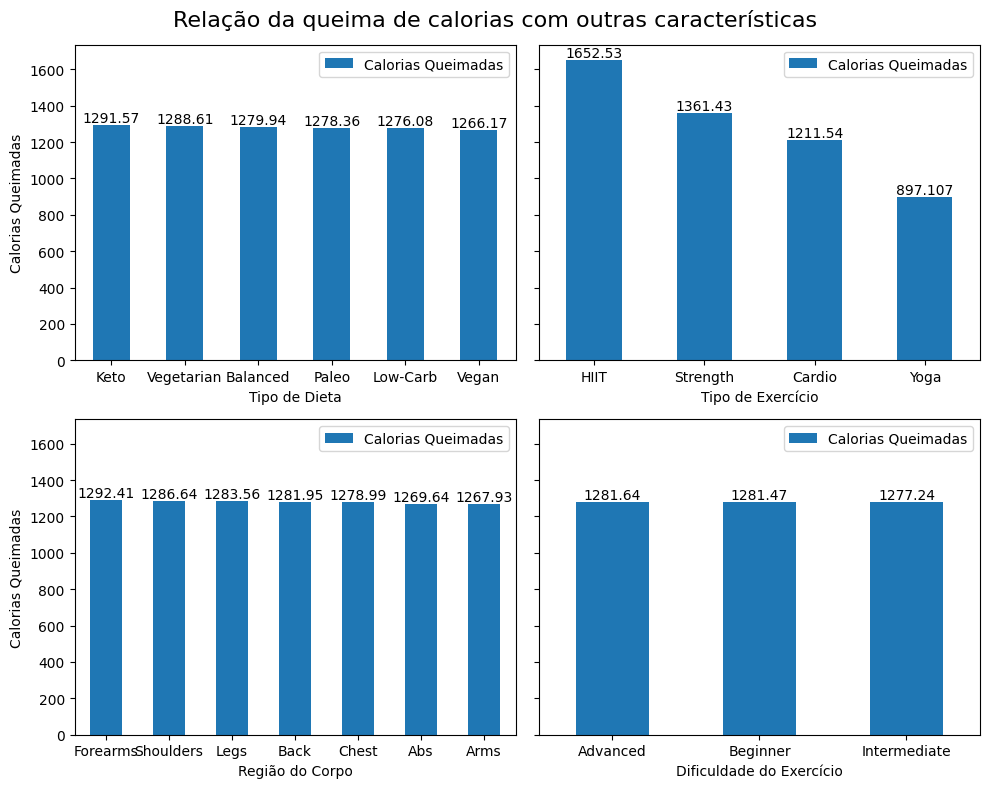

In [121]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharey=True)

plt.suptitle('Relação da queima de calorias com outras características', fontsize=16) # Set the main title

axs = axs.flatten()
ax = axs[0]

df_top_diet_type.plot(kind='bar', y='calories_burned', x='diet_type', rot=0, ax=ax)
ax.bar_label(container=ax.containers[0])
ax.set_xlabel('Tipo de Dieta')

ax = axs[1]

df_top_workout_type.plot(kind='bar', y='calories_burned', x='workout_type', rot=0, ax=ax)
ax.bar_label(container=ax.containers[0])
ax.set_xlabel('Tipo de Exercício')

ax = axs[2]

df_top_body_part.plot(kind='bar', x='body_part', rot=0, ax=ax)
ax.bar_label(container=ax.containers[0])
ax.set_xlabel('Região do Corpo')

ax = axs[3]

df_top_difficulty_level.plot(kind='bar', x='difficulty_level', rot=0, ax=ax)
ax.bar_label(container=ax.containers[0])
ax.set_xlabel('Dificuldade do Exercício')

# Nomeia o rótulo na legenda para todos os gráficos, exceto o último
for ax in axs:
    ax.set_ylabel('Calorias Queimadas')
    ax.legend(['Calorias Queimadas'])

for j in range(4, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [122]:
print('*Desvio Padrão'.upper())
print('Tipo de Dieta:', round(np.std(df_top_diet_type), 2))
print('Tipo de Exercício:', round(np.std(df_top_workout_type), 2))
print('Região do Corpo:', round(np.std(df_top_body_part), 2))
print('Dificuldade do Exercício:', round(np.std(df_top_difficulty_level), 2))

*DESVIO PADRÃO
Tipo de Dieta: 8.34
Tipo de Exercício: 272.35
Região do Corpo: 8.18
Dificuldade do Exercício: 2.03


Dos valores categóricos, o que possui maior desvio padrão é a feature workout_type, portanto seguirei apenas com ela para a etapa de tratamento.

### Tratamento de valores

Já antecipei o tratamento de alguns valores e agora irei preparar apenas o valor categórico para que os modelos possam interpretar seu valor.

Por se tratar de valores de nível nominal (não possuem ordem de comparação), utilizarei o OneHotEncoder que se encarregará de criar uma coluna para cada onde será registrada a presença (1) ou a ausência (0) daquela categoria.

In [123]:
from sklearn.preprocessing import OneHotEncoder

In [124]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[['workout_type']])

df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['workout_type']))
df_encoded

,workout_type_Cardio,workout_type_HIIT,workout_type_Strength,workout_type_Yoga
0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
19995,0.0,0.0,1.0,0.0
19996,0.0,0.0,1.0,0.0
19997,0.0,0.0,1.0,0.0
19998,0.0,0.0,0.0,1.0


In [125]:
training_features.extend(encoder.get_feature_names_out(['workout_type']))

training_features

['calories_burned',
 'session_duration_minutes',
 'experience_level',
 'workout_frequency_days_per_week',
 'water_intake_liters',
 'workout_type_Cardio',
 'workout_type_HIIT',
 'workout_type_Strength',
 'workout_type_Yoga']

In [126]:
df = pd.concat([df, df_encoded], axis=1)
df

,age,gender,weight_kg,height_m,max_bpm,avg_bpm,resting_bpm,calories_burned,workout_type,fat_percentage,...,cal_balance,lean_mass_kg,expected_burn,burns_calories_per_30_min_bc,burns_calories_bin,session_duration_minutes,workout_type_Cardio,workout_type_HIIT,workout_type_Strength,workout_type_Yoga
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1080.90,Strength,26.800377,...,725.10,47.777394,685.1600,7.260425e+19,Medium,60,0.0,0.0,1.0,0.0
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1809.91,HIIT,27.655021,...,-232.91,40.809803,978.6184,1.020506e+20,High,82,0.0,1.0,0.0,0.0
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,802.26,Cardio,24.320821,...,805.74,44.635580,654.5266,1.079607e+20,High,54,1.0,0.0,0.0,0.0
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1450.79,HIIT,32.813572,...,1206.21,63.007432,773.6300,8.987921e+19,High,66,0.0,1.0,0.0,0.0
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1166.40,Strength,17.307319,...,303.60,43.347504,711.4176,5.264685e+19,Low,64,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,46.77,Female,98.31,1.90,199.20,148.18,63.72,761.61,Strength,27.505498,...,1865.39,71.269345,533.2558,7.924402e+19,Medium,46,0.0,0.0,1.0,0.0
19996,40.38,Female,88.12,1.87,196.18,134.18,54.04,2303.13,Strength,26.180562,...,173.87,65.049689,1310.6016,5.708474e+19,Low,118,0.0,0.0,1.0,0.0
19997,50.31,Male,46.20,1.67,163.34,157.92,61.65,1468.80,Strength,23.331802,...,-43.80,35.420708,957.9568,9.101285e+19,High,81,0.0,0.0,1.0,0.0
19998,52.36,Male,44.30,1.62,179.27,121.23,60.88,929.75,Yoga,18.985868,...,346.25,35.889260,928.4004,5.246436e+19,Low,84,0.0,0.0,0.0,1.0


Visualizando o DataFrame com as features que serão utilizadas para treinamento

In [127]:
df[training_features]

,calories_burned,session_duration_minutes,experience_level,workout_frequency_days_per_week,water_intake_liters,workout_type_Cardio,workout_type_HIIT,workout_type_Strength,workout_type_Yoga
0,1080.90,60,2.0,4.0,1.50,0.0,0.0,1.0,0.0
1,1809.91,82,2.0,4.0,1.90,0.0,1.0,0.0,0.0
2,802.26,54,1.0,3.0,1.88,1.0,0.0,0.0,0.0
3,1450.79,66,2.0,4.0,2.50,0.0,1.0,0.0,0.0
4,1166.40,64,2.0,4.0,2.91,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
19995,761.61,46,1.0,3.0,2.99,0.0,0.0,1.0,0.0
19996,2303.13,118,3.0,5.0,3.52,0.0,0.0,1.0,0.0
19997,1468.80,81,2.0,4.0,2.81,0.0,0.0,1.0,0.0
19998,929.75,84,1.0,3.0,1.59,0.0,0.0,0.0,1.0


In [128]:
X = df[training_features].drop(['calories_burned'], axis=1)
y = df['calories_burned']

### Modelagem

Separação de uma proporção (`test_size`) dos dados para teste e o restante para
treinamento

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [130]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

Faço um loop onde a cada volta obtenho o resultado do score com x n_neighbors e armazeno ambos, em tupla, dentro de uma lista onde faço uma ordenação decrescente para encontrar a quantidade ideal para o modelo

In [131]:
values = []
for i in range(9):
    i = i+1
    knn_reg = KNeighborsRegressor(n_neighbors=i)
    knn_reg.fit(X_train, y_train)
    values.append((i,knn_reg.score(X_val, y_val)))

values.sort(key=lambda x: x[1], reverse=True)

print('Ordenação decrescente por Score')
print('n_neighbors | score')
for i, v in values:
    print(f'{i} | {v}')

Ordenação decrescente por Score
n_neighbors | score
2 | 0.9998579955804945
3 | 0.9998541574595865
4 | 0.9998503599187238
5 | 0.9998467585164917
1 | 0.9998265764828013
6 | 0.9998184336284678
7 | 0.9997903175942638
8 | 0.9997464457133468
9 | 0.9997051308552175


Configuração dos modelos + treinamento com os dados de treinamento extraidos de train_test_split

In [132]:
knn_reg = KNeighborsRegressor(n_neighbors=2)
lr_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)

In [133]:
knn_reg.fit(X_train, y_train)
lr_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Testes

Visualização da pontuação de cada modelo.
A maior pontuação fica com Random Forest (Quanto mais próximo de 1, melhor)

In [134]:
print('KNeighbors:', knn_reg.score(X_val, y_val))
print('Regressão Linear:', lr_reg.score(X_val, y_val))
print('Random Forest:', rf_reg.score(X_val, y_val))

KNeighbors: 0.9998579955804945
Regressão Linear: 0.9669868670040314
Random Forest: 0.9998803194027814


Importando métricas para avaliar a precisão da predição do modelo:

- mean_absolute_error -> *Erro Médio Absoluto*
- root_mean_squared_error -> *Erro Médio Quadrático*

In [135]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

In [136]:
knn_pred = knn_reg.predict(X_val)
lr_pred = lr_reg.predict(X_val)
rf_pred = rf_reg.predict(X_val)

In [137]:
print('*Erro médio absoluto')
print('KNeighbors:', mean_absolute_error(y_val, knn_pred))
print('Regressão Linear:', mean_absolute_error(y_val, lr_pred))
print('Random Forest:', mean_absolute_error(y_val, rf_pred))

*Erro médio absoluto
KNeighbors: 4.369312121212121
Regressão Linear: 60.647712776922255
Random Forest: 4.146535198464783


In [138]:
print('*Raiz quadrada do erro médio')
print('KNeighbors:', root_mean_squared_error(y_val, knn_pred))
print('Regressão Linear:', root_mean_squared_error(y_val, lr_pred))
print('Random Forest:', root_mean_squared_error(y_val, rf_pred))

*Raiz quadrada do erro médio
KNeighbors: 5.989570764202884
Regressão Linear: 91.32467610526935
Random Forest: 5.498657177054216


Gráfico de dispersão da relação entre `valores previstos vs valores reais`.
A linha vermelha representa o valor real e os pontos azuis os valores previstos pelo modelo

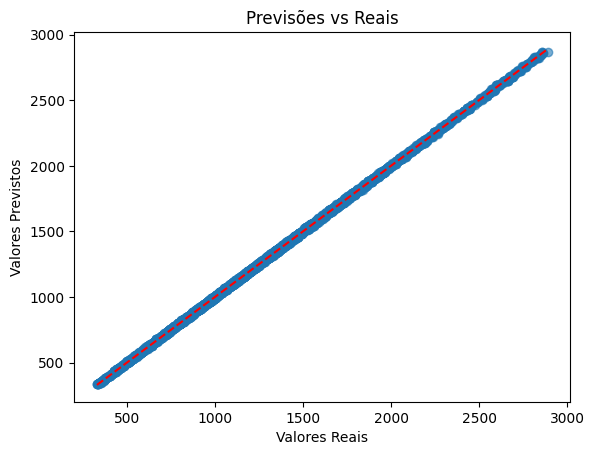

In [139]:
plt.scatter(y_val, rf_pred, alpha=0.6)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Previsões vs Reais")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.show()

In [140]:
rf_reg.feature_names_in_

array(['session_duration_minutes', 'experience_level',
       'workout_frequency_days_per_week', 'water_intake_liters',
       'workout_type_Cardio', 'workout_type_HIIT',
       'workout_type_Strength', 'workout_type_Yoga'], dtype=object)

In [143]:
# Testes
X_new = pd.DataFrame([[40, 2, 5, 2, 0, 0, 1, 0]], columns=rf_reg.feature_names_in_)
X_new_2 = pd.DataFrame([[40, 2, 5, 2, 0, 1, 0, 0]], columns=rf_reg.feature_names_in_)
X_new_3 = pd.DataFrame([[40, 2, 5, 2, 1, 0, 0, 0]], columns=rf_reg.feature_names_in_)
X_new_4 = pd.DataFrame([[40, 2, 5, 2, 0, 0, 0, 1]], columns=rf_reg.feature_names_in_)

In [144]:
print(f'Calorias queimadas com Strength: {rf_reg.predict(X_new)[0]:.2f} cal')
print(f'Calorias queimadas com HIIT:     {rf_reg.predict(X_new_2)[0]:.2f} cal')
print(f'Calorias queimadas com Cardio:   {rf_reg.predict(X_new_3)[0]:.2f} cal')
print(f'Calorias queimadas com Yoga:     {rf_reg.predict(X_new_4)[0]:.2f} cal')

Calorias queimadas com Strength: 672.29 cal
Calorias queimadas com HIIT:     817.72 cal
Calorias queimadas com Cardio:   596.27 cal
Calorias queimadas com Yoga:     444.60 cal
